# Explore Data Anlysis

In [5]:
import warnings
import os
warnings.filterwarnings('ignore')
# get all the paths
data_dir_list = os.listdir('dataset-2')
print(data_dir_list)
path, dirs, files = next(os.walk("dataset-2"))
file_count = len(files)
# print(file_count)

['ganja', 'pepaya', 'singkong']


In [6]:
# make new base directory
original_dataset_dir = 'dataset-2'
base_dir = 'leaves-data-2'
os.mkdir(base_dir)

In [7]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [8]:
# create two folders in base_dir train and val
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

# under train folder create 4 folder (ganja, singkong, pepaya)
train_ganja_dir = os.path.join(train_dir, 'ganja')
os.mkdir(train_ganja_dir)
train_singkong_dir = os.path.join(train_dir, 'singkong')
os.mkdir(train_singkong_dir)
train_pepaya_dir = os.path.join(train_dir, 'pepaya')
os.mkdir(train_pepaya_dir)

# under validation folder create 4 folder (ganja, singkong, pepaya)
validation_ganja_dir = os.path.join(validation_dir, 'ganja')
os.mkdir(validation_ganja_dir)
validation_singkong_dir = os.path.join(validation_dir, 'singkong')
os.mkdir(validation_singkong_dir)
validation_pepaya_dir = os.path.join(validation_dir, 'pepaya')
os.mkdir(validation_pepaya_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'leaves-data-2\\train'

In [9]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")
    
    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[:valid_length]
    
    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)
    
    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [10]:
GANJA_SOURCE_DIR = 'dataset-2/ganja/'
TRAINING_GANJA_DIR = 'leaves-data-2/train/ganja/'
VALID_GANJA_DIR = 'leaves-data-2/validation/ganja/'

SINGKONG_SOURCE_DIR = 'dataset-2/singkong/'
TRAINING_SINGKONG_DIR = 'leaves-data-2/train/singkong/'
VALID_SINGKONG_DIR = 'leaves-data-2/validation/singkong/'

PEPAYA_SOURCE_DIR = 'dataset-2/pepaya/'
TRAINING_PEPAYA_DIR = 'leaves-data-2/train/pepaya/'
VALID_PEPAYA_DIR = 'leaves-data-2/validation/pepaya/'

In [11]:
import os
import random
from shutil import copyfile

split_size = 0.85

split_data(GANJA_SOURCE_DIR, TRAINING_GANJA_DIR, VALID_GANJA_DIR, split_size)
split_data(SINGKONG_SOURCE_DIR, TRAINING_SINGKONG_DIR, VALID_SINGKONG_DIR, split_size)
split_data(PEPAYA_SOURCE_DIR, TRAINING_PEPAYA_DIR, VALID_PEPAYA_DIR, split_size)

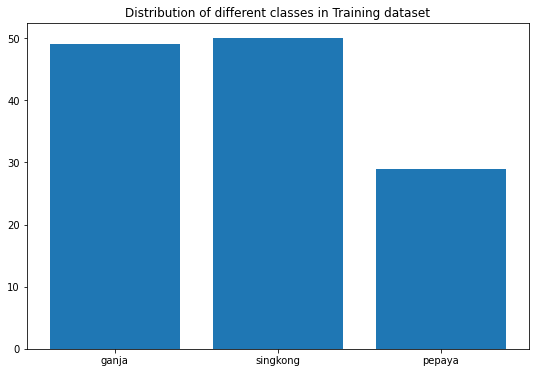

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['ganja', 'singkong', 'pepaya']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('leaves-data-2/train/' + i + '/'))
    nimgs[i] = nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training dataset')
plt.show()

In [13]:
for i in image_folder:
    print('Total images in {} train folder: {}'.format(i, len(os.listdir('leaves-data-2/train/' + i + '/'))))

Total images in ganja train folder: 49
Total images in singkong train folder: 50
Total images in pepaya train folder: 29


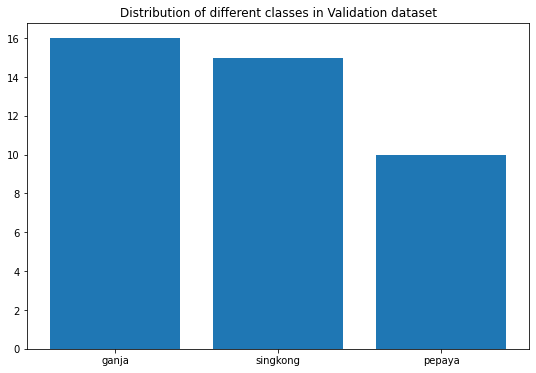

In [14]:
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('leaves-data-2/validation/' + i + '/'))
    nimgs[i] = nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation dataset')
plt.show()

In [15]:
for i in image_folder:
    print('Total images in {} validation folder: {}'.format(i, len(os.listdir('leaves-data-2/validation/' + i + '/'))))

Total images in ganja validation folder: 16
Total images in singkong validation folder: 15
Total images in pepaya validation folder: 10


# Deep Learning with Data Augmentation

In [2]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
img_width, img_height = 256, 256
batch_size = 16

In [4]:
TRAINING_DIR = 'leaves-data-2/train/'

train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=30,
                                    zoom_range=0.4,
                                    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_width, img_height))

Found 128 images belonging to 3 classes.


In [5]:
VALIDATION_DIR = 'leaves-data-2/validation/'

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                                batch_size=batch_size,
                                                                class_mode='categorical',
                                                                target_size=(img_width, img_height))

Found 41 images belonging to 3 classes.


In [6]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best model
best_model_file = 'best_model.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_accuracy', verbose = 1, save_best_only = True)

In [7]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

In [8]:
model.compile(optimizer='Adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [9]:
history = model.fit_generator(train_generator,
                                epochs=30,
                                verbose=1,
                                validation_data=validation_generator,
                                callbacks=[best_model])

C:\Users\farhan\AppData\Local\Temp\ipykernel_12712\2206974862.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 1.1511 - accuracy: 0.3906

KeyboardInterrupt: 

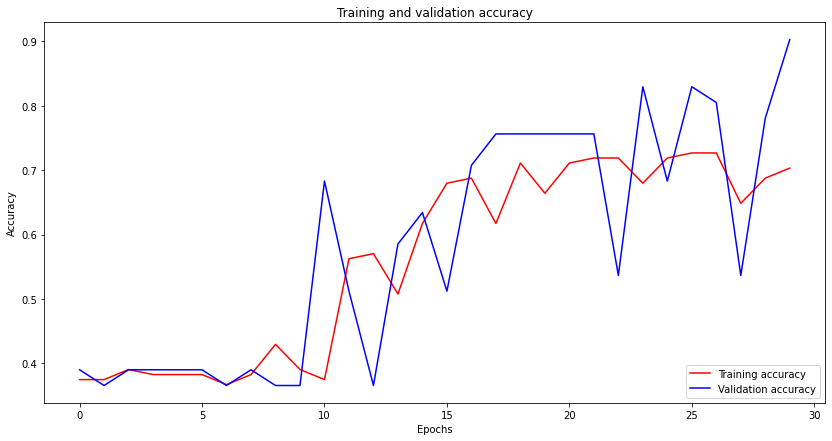

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig = plt.figure(figsize=(14, 7))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

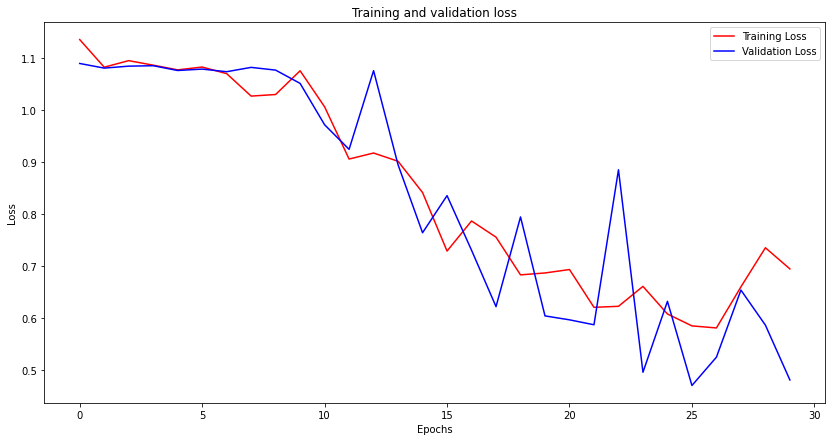

In [34]:
fig2 = plt.figure(figsize=(14, 7))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend(loc='upper right')
plt.show()

In [35]:
# show accuracy and loss
score = model.evaluate_generator(validation_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.48170211911201477
Test accuracy: 0.9024389982223511


In [39]:
from keras import utils
from keras.models import load_model
import numpy as np

In [57]:
# import libraries
from tkinter import *
from tkinter import filedialog
from PIL import ImageTk, Image

# create root window
root = Tk()
root.title("Deteksi Daun")
root.geometry("500x400")

# create fungsi enable button
def enable_button():
    loadCitra.config(state=NORMAL)
    grayscale.config(state=NORMAL)
    identifikasi.config(state=NORMAL)

# function load citra
def load_citra():
    root.filname = filedialog.askopenfilename(initialdir='D:/UPN/Semester/semester5', title="Select A File", filetypes=(("jpg files", "*.jpg"), ("all files", "*.*")))

    # load image
    ori_image = Image.open(root.filname)
    # resize image
    resized_img1 = ori_image.resize((150, 150), Image.ANTIALIAS)
    

    empt1 = ImageTk.PhotoImage(resized_img1)
    empty1 = Label(root, image=empt1)
    empty1.image = empt1

    # pasangkan gambar
    empty1.grid(row=1, column=1, rowspan=3, padx=5)

    # get just file name without path
    file_name = root.filname.split("/")[-1]
    # print file name in input
    name.insert(0, file_name)

# function grayscale image
def grayscale_image():
    gray_img = Image.open(root.filname).convert('L')
    resized_img2 = gray_img.resize((150, 150), Image.ANTIALIAS)

    empt2 = ImageTk.PhotoImage(resized_img2)
    empty2 = Label(root, image=empt2)
    empty2.image = empt2

    # pasangkan gambar
    empty2.grid(row=1, column=2, rowspan=3, padx=5)

# function identifikasi
def identif():
    # load model
    model = load_model(best_model_file)
    
    # load image
    # img = Image.open(root.filname).convert('L')
    # resize image
    img = utils.load_img(root.filname, target_size=(256, 256))

    x = utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    class_pred = np.argmax(classes, axis=1)
    
    # get class name
    if class_pred == 0:
        class_name = "Daun ganja"
    elif class_pred == 1:
        class_name = "Daun pepaya"
    else:
        class_name = "Daun singkong"

    # print class name in input
    result.insert(0, class_name)

# buat fungsi reset
# fungsi ini digunakan untuk menghapus semua hasil dari load citra
def reset():
    # hapus semua hasil dari load citra
    empty1 = Label(root, image=empt1)
    empty1.image = empt1
    
    empty2 = Label(root, image=empt2)
    empty2.image = empt2

    empty1.grid(row=1, column=1, rowspan=3, padx=5)
    empty2.grid(row=1, column=2, rowspan=3, padx=5)

    name.delete(0, END)
    result.delete(0, END)

# create menu button
loadNet = Button(root, text="Load Net", padx=10, pady=5, fg="white", bg="#263D42", command=enable_button)
loadCitra = Button(root, text="Load Citra", padx=10, pady=5, fg="white", bg="#263D42", state="disable", command=load_citra)
grayscale = Button(root, text="Grayscale", padx=10, pady=5, fg="white", bg="#263D42", state="disable", command=grayscale_image)
identifikasi = Button(root, text="Identifikasi", padx=10, pady=5, fg="white", bg="#263D42", state="disable", command=identif)
reset = Button(root, text="Reset", padx=10, pady=5, fg="white", bg="#263D42", command=reset)

name = Entry(root, width=15)
result = Entry(root, width=15)

# image for empty
blank1 = Image.open("empty.jpg")
# resize image
resized_balnk1 = blank1.resize((150, 150), Image.ANTIALIAS)

empt1 = ImageTk.PhotoImage(resized_balnk1)
empty1 = Label(root, image=empt1)
empty1.image = empt1

# image for empty
blank2 = Image.open("empty2.jpg")
# resize image
resized_balnk2 = blank2.resize((150, 150), Image.ANTIALIAS)

empt2 = ImageTk.PhotoImage(resized_balnk2)
empty2 = Label(root, image=empt2)
empty2.image = empt2

loadNet.grid(row=0, column=0, padx=5, pady=5)
loadCitra.grid(row=1, column=0, padx=5, pady=5)
name.grid(row=2, column=0, padx=5, pady=5)
grayscale.grid(row=3, column=0, padx=5, pady=5)
identifikasi.grid(row=4, column=0, padx=5, pady=5)
result.grid(row=5, column=0, padx=5, pady=5)
reset.grid(row=6, column=0, padx=5, pady=5)

empty1.grid(row=1, column=1, rowspan=3, padx=5)
empty2.grid(row=1, column=2, rowspan=3, padx=5)

root.mainloop()

1/1 [==============================] - 0s 166ms/step
